# Exp8 #

Some unfinished exps using fast SGD...

In [3]:
from glob import glob

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_predict, StratifiedKFold
from sklearn.metrics import fbeta_score

from glove_transformer import GloveVectorizer

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

data = pd.read_csv(open('semeval2016-task6-trainingdata-utf-8.txt'), '\t',
                   encoding='utf8')
targets = list(data.Target.unique()) + ['All']

glove_fnames = glob('glove_vecs/*.pkl')
glove_ids = [fname.split('/')[-1].split('_')[0] for fname in glove_fnames]

results = pd.DataFrame(np.zeros((len(targets), len(glove_ids))),
                       columns=glove_ids,
                       index=targets)

In [32]:
for fname, glove_id in zip(glove_fnames, glove_ids):
    print 80 * '='
    print 'GLOVE VECTORS:', glove_id
    print 80 * '='

    glove_vecs = pd.read_pickle(fname)

    for target in targets:
        print 80 * "-"
        print 'TARGET:', target
        print 80 * "-"

        target_data = data[data.Target == target] if target != 'All' else data
        true_stances = target_data.Stance

        cv = StratifiedKFold(true_stances, n_folds=5, shuffle=True,
                             random_state=1)

        pipeline = Pipeline([('vect', GloveVectorizer(glove_vecs)),
                             ('clf', SGDClassifier(n_iter=50, class_weight='balanced'))
                             ])

        pred_stances = cross_val_predict(pipeline, target_data.Tweet, true_stances,
                                         cv=cv)
        print classification_report(true_stances, pred_stances, digits=4)

        macro_f = fbeta_score(true_stances, pred_stances, 1.0,
                              labels=['AGAINST', 'FAVOR'], average='macro')
        print 'macro-average of F-score(FAVOR) and F-score(AGAINST): {:.4f}\n'.format(
            macro_f)

        results.at[target,glove_id] = macro_f


print results

GLOVE VECTORS: glove.42B.300d
--------------------------------------------------------------------------------
TARGET: Atheism
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

    AGAINST     0.7727    0.7829    0.7778       304
      FAVOR     0.4400    0.4783    0.4583        92
       NONE     0.6381    0.5726    0.6036       117

avg / total     0.6824    0.6803    0.6808       513

macro-average of F-score(FAVOR) and F-score(AGAINST): 0.6181

--------------------------------------------------------------------------------
TARGET: Climate Change is a Real Concern
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

    AGAINST     0.4286    0.2000    0.2727        15
      FAVOR     0.7434    0.7925    0.7671       212
       NONE     0.7099    0.6845    0.6970       168

avg / total     0.7172    0.7241    0.7185   

In [7]:
results

,glove.42B.300d,glove.6B.100d,glove.6B.200d,glove.6B.300d,glove.6B.50d,glove.840B.300d,glove.twitter.27B.100d,glove.twitter.27B.200d,glove.twitter.27B.25d,glove.twitter.27B.50d
Atheism,0.604430,0.600661,0.589606,0.585291,0.517637,0.656996,0.609371,0.624850,0.539105,0.499233
Climate Change is a Real Concern,0.549488,0.405644,0.507467,0.533784,0.420047,0.364508,0.414950,0.460005,0.348101,0.384170
Feminist Movement,0.511931,0.455484,0.447741,0.508035,0.469117,0.516623,0.502820,0.543311,0.434931,0.412980
Hillary Clinton,0.533430,0.485408,0.522404,0.476593,0.486597,0.477115,0.519979,0.565678,0.431984,0.430841
Legalization of Abortion,0.588617,0.478632,0.505067,0.576012,0.408589,0.550268,0.536805,0.530300,0.405390,0.488893
All,0.495749,0.500177,0.475014,0.496247,0.457074,0.487048,0.478093,0.532348,0.456066,0.464135


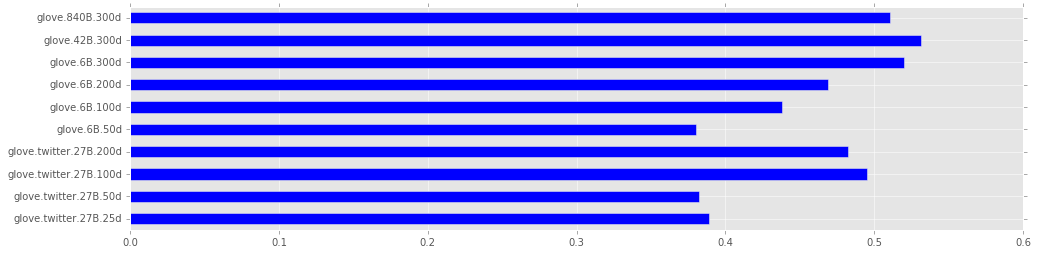

In [33]:
ordered = [
    u'glove.twitter.27B.25d', u'glove.twitter.27B.50d',u'glove.twitter.27B.100d', u'glove.twitter.27B.200d',
    u'glove.6B.50d', u'glove.6B.100d', u'glove.6B.200d', u'glove.6B.300d',
    'glove.42B.300d', 
    u'glove.840B.300d'
]

results = results[ordered]


results.loc['All'].plot.barh(figsize=(16, 4))

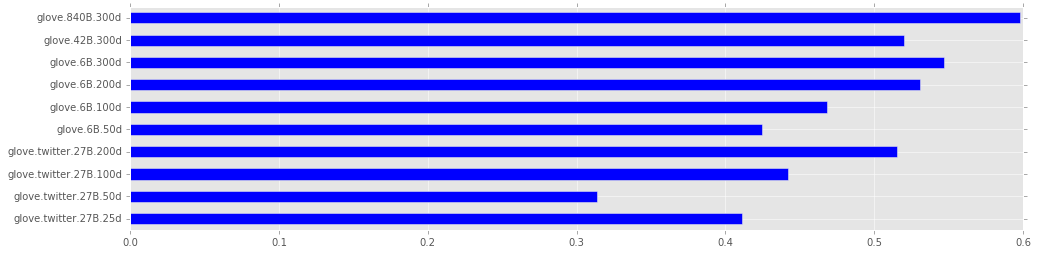

In [34]:
results.loc['Climate Change is a Real Concern'].plot.barh(figsize=(16, 4))